## Example 1

Predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.
Dataset: Medical Cost dataset publicly available from Kaggle and hosted on GitHub.

In [2]:
import pandas as pd
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [30]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
# checking for missing values
print('Total amount of missing data: ', insurance.isna().sum())

Total amount of missing data:  age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [37]:
# split the data
from sklearn.model_selection import train_test_split
X = insurance.drop('charges', axis=1)
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [39]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help normalize/preprocess the data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

# Fit column transformer on the training data only (to avoid data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [40]:

# Non-normalized and non-one-hot encoded data example
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [41]:

# The normalized/one-hot encoded shape iare different because by performing the one-hot encoder transformation additional columns were added
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [13]:
# set random seed
import tensorflow as tf
tf.random.set_seed(42)

In [42]:

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics = ['mae'])


model_1.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [44]:

# Evaulate the model
model_1_loss, model_1_mae = model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 11289.7002 - mae: 11289.7002


In [45]:
# Build the model_2 (3 layers, 64, 64, 1 units, the 2 hiden layers with activation = 'relu')
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics = ['mae'])


model_2.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [46]:
# Evaulate the model
model_2_loss, model_2_mae = model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1829.3907 - mae: 1829.3907


## Example 2

The dataset taken from the StatLib library is maintained at Carnegie Mellon University.
Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s.

Targets are the median values of the houses at a location (in k$).

Feature 12 will be removed due to ethical reasons.
Here is a list of the remaining 12 features in order:
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000
* PTRATIO pupil-teacher ratio by town

* LSTAT % lower status of the population MEDV Median value of owner-occupied homes in $1000's


Tha data is already split 20/80 (test, training)


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
data = tf.keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test)  = data.load_data( path='boston_housing.npz')


In [16]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [18]:
X_train_del = np.delete(X_train, 11,1)
X_test_del = np.delete(X_test, 11,1)
X_train_del.shape, X_test_del.shape

((404, 12), (102, 12))

In [19]:
X_train_del, X_train

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 3.07000e+02,
         2.10000e+01, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 3.48000e+02,
         1.47000e+01, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
         2.02000e+01, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 3.04000e+02,
         1.69000e+01, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
         1.47000e+01, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 2.65000e+02,
         1.56000e+01, 4.38000e+00]]),
 array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1

## Preprocessing the Data

All features are numeric but in different scales.

Rescaling the features so they are in similar ranges before proceeding with model building.

StandardScaler() from Scikit-learn will be used to scale the data

In [21]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training dataset
scaler.fit(X_train_del)

# Call the transform method to scale both the training and testing data, using the same transformation
X_train_norm = scaler.transform(X_train_del)
X_test_norm = scaler.transform(X_test_del)

In [22]:
## Model Building

#define the input shape

input_shape = X_train_norm.shape[1]

In [37]:
# model_1 (2 layers, 20 and 1 units, the hiden layers with activation = 'relu')

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(), # the default "Learning-Rate" is 0.001
    loss='mse',
    metrics = ['mae'] # used to monitor the training and testing steps.
    )


history = model_1.fit(X_train_norm, y_train, epochs=200, verbose=0)

In [39]:
# Inspect the model
train_eval = model_1.evaluate(X_train_norm, y_train)
print ("Training data MAE: {:.2}".format(train_eval[1]))

13/13 [==============================] - 0s 2ms/step - loss: 8.9162 - mae: 2.1148
Training data MAE: 2.1


In [40]:
history.history.keys()

dict_keys(['loss', 'mae'])

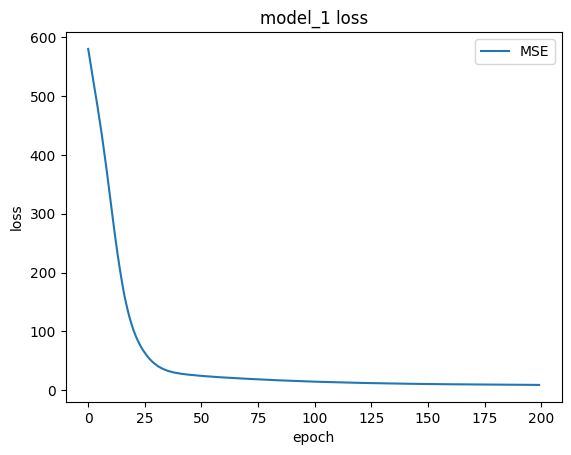

In [41]:
plt.plot(history.history['loss'], label='MSE')
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

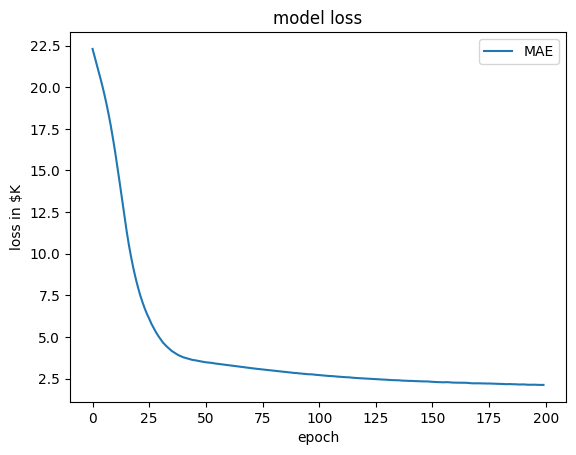

In [42]:
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss in $K')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testing the model

In [43]:
test_eval = model_1.evaluate(X_test_norm, y_test)
print ("Test data MAE: {:.2}".format(test_eval[1]))

4/4 [==============================] - 0s 20ms/step - loss: 20.5411 - mae: 3.0017
Test data MAE: 3.0


In [44]:
rsme = round(np.sqrt(test_eval[0]), 3)
rsme

4.532

:The model has an RMSE errror of around USD 4500 and an MAE around USD 3000

4/4 [==============================] - 0s 5ms/step


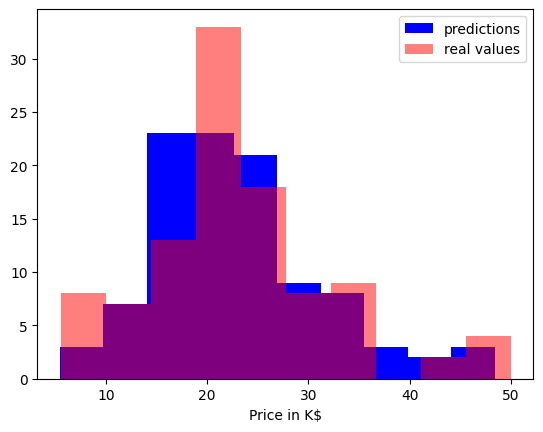

In [45]:
## visualise the differences between the values predict by the model and the real values
y_hat = model_1.predict(X_test_norm)

plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Price in K$')
plt.legend();

# Using KerasTuner to optimize hyperparameters

The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn

In [47]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.1 MB/s eta 0:00:00


In [49]:
import keras_tuner as kt

In [51]:
def build_model(hp):
  model_2 = tf.keras.Sequential()
  model_2.add(tf.keras.layers.Dense(
      hp.Choice('units', [32, 64, 128]),
      activation='relu'))

  # Tune the learning rate for the optimizer, choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
  model_2.add(tf.keras.layers.Dense(1))
  model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mse', metrics = ['mae'])
  return model_2

In [52]:
# Initialize a tuner (here, RandomSearch). Use max_trials to specify the number of different models to try.

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [53]:
tuner.search(
    X_train_norm, y_train,
    epochs=500,
    validation_data=(x_test_norm, y_test))

best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 01m 23s]
val_loss: 17.887571334838867

Best val_loss So Far: 13.604146003723145
Total elapsed time: 00h 05m 42s


In [54]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [55]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 13.604146003723145

Trial 1 summary
Hyperparameters:
units: 128
learning_rate: 0.001
Score: 14.770978927612305

Trial 4 summary
Hyperparameters:
units: 32
learning_rate: 0.001
Score: 17.887571334838867

Trial 0 summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 22.093236923217773

Trial 3 summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 27.879547119140625


In [56]:
## visualise the differences between the values predict by the model (with the best parameters form the tuner) and the real values

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss='mse',
    metrics = ['mae']
    )


history = model_3.fit(X_train_norm, y_train, epochs=500, verbose=0)

In [57]:
# Inspect the model
train_eval_3 = model_3.evaluate(X_train_norm, y_train)
print ("Training data MAE: {:.2}".format(train_eval_3[1]))

13/13 [==============================] - 0s 3ms/step - loss: 2.0331 - mae: 1.0421
Training data MAE: 1.0


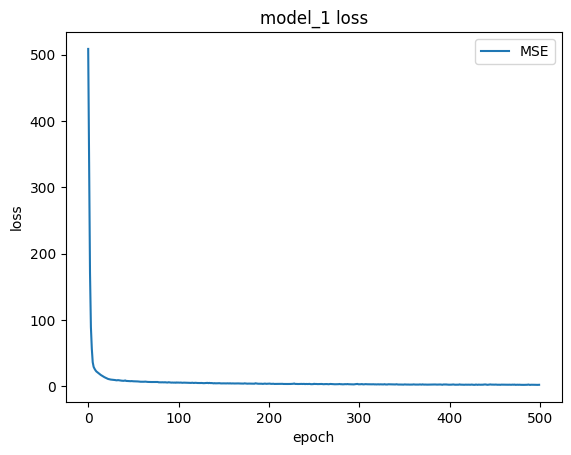

In [58]:
plt.plot(history.history['loss'], label='MSE')
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [59]:
# Testing the model
test_eval_3 = model_3.evaluate(X_test_norm, y_test)
print ("Test data MAE: {:.2}".format(test_eval_3[1]))

4/4 [==============================] - 0s 5ms/step - loss: 14.3199 - mae: 2.4186
Test data MAE: 2.4


In [61]:
rsme = round(np.sqrt(test_eval_3[0]), 3)
rsme

3.784

The model has an RMSE errror of around USD 3800 and an MAE around USD 2400. There is some reduction on both the RMSE and the MAE in comparison with model_1

4/4 [==============================] - 0s 4ms/step


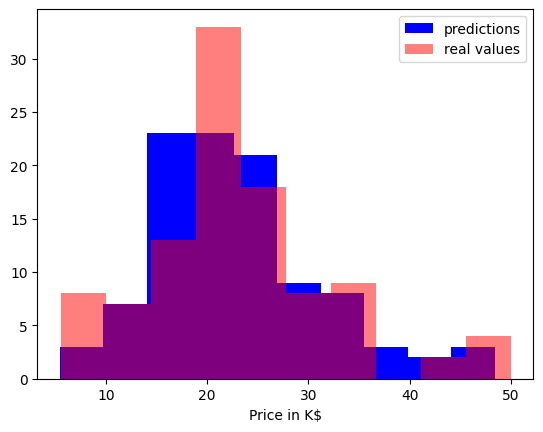

In [60]:
y_hat_3 = model_1.predict(X_test_norm)

plt.hist(y_hat_3, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Price in K$')
plt.legend();